In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.colors as pc
from plotly.subplots import make_subplots

# Data Preprocessing

In [2]:
companies = pd.read_csv("C:\\Users\\hp\\Downloads\\Unicorn_Companies_new.csv")
companies.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2


In [3]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company            1037 non-null   object
 1   Valuation ($B)     1037 non-null   object
 2   Date Joined        1037 non-null   object
 3   Country            1037 non-null   object
 4   City               1037 non-null   object
 5   Industry           1037 non-null   object
 6   Select Inverstors  1037 non-null   object
 7   Founded Year       1037 non-null   object
 8   Total Raised       1037 non-null   object
 9   Financial Stage    1037 non-null   object
 10  Investors Count    1037 non-null   object
 11  Deal Terms         1037 non-null   object
 12  Portfolio Exits    1037 non-null   object
dtypes: object(13)
memory usage: 105.4+ KB


In [ ]:
# Type Casting the columns to their appropriate datatypes

In [4]:
companies['Valuation ($B)']=companies['Valuation ($B)'].str.replace('$','').astype('float64')

<ipython-input-4-3d0dd5aeb5f1>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  companies['Valuation ($B)']=companies['Valuation ($B)'].str.replace('$','').astype('float64')


In [6]:
print('Unique values in Founded year: ',companies['Founded Year'].unique())
missing_founded_yr_companies=companies[companies['Founded Year']=='None'].Company.to_list()
dic_missing_value_company=dict.fromkeys(missing_founded_yr_companies)

Unique values in Founded year:  ['2012' '2002' '2010' '2005' '1991' '2013' '2015' '2018' '1995' '2008'
 '2011' '2006' '2016' '2017' '2009' '2003' '1998' '2014' 'None' '2001'
 '2007' '2019' '1996' '1992' '2004' '2020' '1999' '1994' '2000' '1919'
 '2021' '1973' '1979' '1984' '1990' '1997' '1993']


When I tried converting the 'Founded Year' to integer, I found my rows assigned to 'None' which can be checked as shown. Before, we convert this variable to int, we will have to handle None type values of this variable. 

I created a list of comapnies with missing values and then converted it to dictionary. I manually filled these missing values from internet as number of missing values was not too high, around 24 in total. 

In [7]:
companies['Date Joined'] =  pd.to_datetime(companies['Date Joined'])
companies['Year Joined'] =companies['Date Joined'].dt.year

In [10]:
dic_missing_value_company={'Weilong': '1999',
 'Hopin': '2019',
 'Argo AI': '2016',
 'Ola Cabs': '2010',
 'C6 Bank': '2018',
 'Chipone': '2008',
 'SSENSE': '2003',
 'CRED': '2018',
 'Zapier': '2011',
 'Clubhouse': '2020',
 'Paxos': '2012',
 'Tubatu.com': '2008',
 'Netlify': '2014',
 'eDaili': '2015',
 'Harness': '2016',
 'Wave': '2009',
 'Zhubajie': '2006',
 'Carzone': '1998',
 'Changingedu': '2014',
 'Uplight': '2019',
 'Coda': '2014',
 'Veepee': '2001',
 'You & Mr Jones': '2015',
 'WTOIP': '2013',
 'Fair': '2018',
 'Pilot.com': '2016',
 'Elemy': '2020',
 'Qingting FM': '2011',
 '56PINGTAI': '2013',
 'JimuBox': '2012',
 'Kuaigou Dache': '2014',
 'Numbrs': '2012',
 'Socar': '1992',
 'Hyperchain': '2016',
 'SaltPay': '2019',
 'Amount': '2019',
 'Matrixport': '2019',
 'Carson Group': '2012',
 'PicsArt': '2011',
 'Mammoth Biosciences': '2017',
 'Orchard': '2013',
 'Stytch': '2020',
 'Watershed': '2019'}

for company,year in dic_missing_value_company.items():
    companies.loc[companies['Company']==company,'Founded Year']=year
    
companies['Founded Year'] =  companies['Founded Year'].astype('int')

In [11]:
#Total Raised
companies = companies.loc[companies['Total Raised']!='None']

companies['Total Raised B/M/K']=companies['Total Raised'].str.strip().str[-1]

companies['Total Raised']=companies['Total Raised'].str.replace('B','')
companies['Total Raised']=companies['Total Raised'].str.replace('M','')
companies['Total Raised']=companies['Total Raised'].str.replace('K','')
companies['Total Raised']=companies['Total Raised'].str.replace('$','').astype('float64')

companies['Total Raised ($B)']=0
companies['Total Raised ($B)']=np.where(companies['Total Raised B/M/K'] == 'B', companies['Total Raised'], companies['Total Raised ($B)'])
companies['Total Raised ($B)']=np.where(companies['Total Raised B/M/K'] == 'M', companies['Total Raised']/1000, companies['Total Raised ($B)'])
companies['Total Raised ($B)']=np.where(companies['Total Raised B/M/K'] == 'K', companies['Total Raised']/1000000, companies['Total Raised ($B)'])


<ipython-input-11-1cc9364496f9>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  companies['Total Raised']=companies['Total Raised'].str.replace('$','').astype('float64')


This column contains value with multiple units like Million and Billion. Firstly, we exyracted the unit from the columns and saved it in new column called 'Total Raised B/M/K'. After that removed the units from the column followed by converting it to float type. 

Now, we need to do few more changes, as values all values in the columns were not in same unit. Using conditional approach to converted the values based on its original units.

In [13]:
#Investors Count
companies.loc[companies['Company']=='Fair','Investors Count'] = 37

Investors Count were missing for company named Fair. manual assignment was done. 

In [14]:
#New Feature
companies['years_to_unicorn']=companies['Year Joined']-companies['Founded Year']

In [15]:
#drop cols
companies=companies.drop(['Date Joined','Portfolio Exits','Total Raised','Total Raised B/M/K'],axis=1)

# Univaraite Analysis

<AxesSubplot:xlabel='years_to_unicorn', ylabel='Count'>

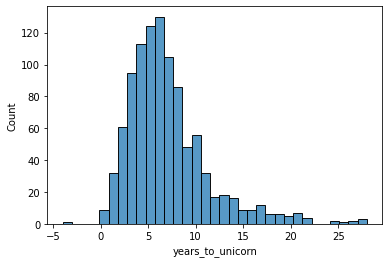

In [16]:
#Years_to_unicorn Distribution
sns.histplot(companies[companies['years_to_unicorn']<30]['years_to_unicorn'])

We can see some negative values on x axis. This needs to be corrected. 

<AxesSubplot:xlabel='years_to_unicorn', ylabel='Count'>

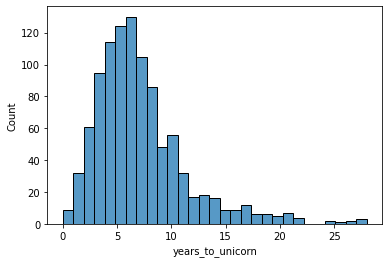

In [17]:
companies[companies['years_to_unicorn']<0]
companies.loc[companies['Company']=='Yidian Zixun','Founded Year']=2013
companies.loc[companies['Company']=='Yidian Zixun','years_to_unicorn']=4
sns.histplot(companies[companies['years_to_unicorn']<30]['years_to_unicorn'])

After correcting the negative value, we have the required distribution. We have removed companies with years_to_unicorn more than 30. 

**Insights**
1. Most of the companies become unicorn between 4 to 9 years. 
2. There are very few companies which takes more than 22-23 years to become unicorns

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year Joined', ylabel='count'>

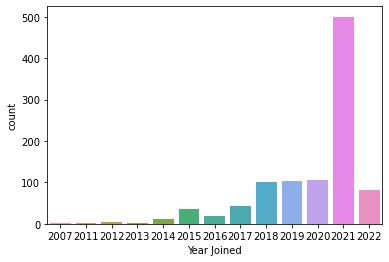

In [19]:
#Year Joined
sns.countplot(companies['Year Joined'])

**Insight :**
2021 has most of the companies emerged as Unicorns. For the last three years, emergance of new unicorns were consistent. 

<AxesSubplot:xlabel='Valuation ($B)', ylabel='Company'>

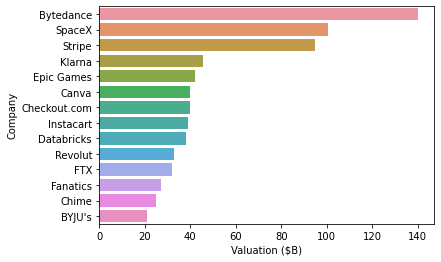

In [20]:
#Top Companies by Valuations
temp=companies[companies['Valuation ($B)']>20]
sns.barplot(x=temp['Valuation ($B)'],y=temp['Company'])

**Insights :**
* Bytedance is the most valued unicorn with the valuation of 140$ Billions.

* Indian unicorn Byju makes it to the list with valuation of 20$ Billion.
* Bytedance is followed by SpaceX and Stripe with the 2nd and 3rd highest valuations <p>

# Multivariate Analysis

**Country Analysis**

In [21]:
#Country Analysis

temp=companies.groupby(by=['Country']).agg({'Country':['count'],'Valuation ($B)': ['sum', 'mean'],'Total Raised ($B)': ['sum', 'mean'],'years_to_unicorn':['mean']})
temp=temp.sort_values([('Country', 'count')], ascending=False)
temp=temp.loc[temp[('Country', 'count')]>10]
temp

Country Valuation ($B)           Total Raised ($B)            \
                 count            sum      mean               sum      mean   
Country                                                                       
United States      519        1794.59  3.457784         263.73280  0.508156   
China              164         568.47  3.466280         120.71736  0.736081   
India               62         179.55  2.895968          44.70899  0.721113   
United Kingdom      41         173.18  4.223902          29.08273  0.709335   
France              24          49.87  2.077917          12.72962  0.530401   
Germany             23          64.50  2.804348          17.81735  0.774667   
Israel              20          38.42  1.921000           6.57002  0.328501   
Canada              19          49.03  2.580526           7.27156  0.382714   
Brazil              16          36.98  2.311250           8.20802  0.513001   
South Korea         12          27.12  2.260000           5.38973  0.449144   
Singapore           12          17.55  1.462500           6.11302  0.509418   

               years_to_unicorn  
                           mean  
Country                          
United States          6.845857  
China                  6.036585  
India                  7.629032  
United Kingdom         8.073171  
France                 7.416667  
Germany                9.434783  
Israel                 7.200000  
Canada                10.263158  
Brazil                 8.062500  
South Korea           12.000000  
Singapore              6.916667

We will start with analysing unicorns in different countries. We will focus on total number of unicorns, Valuations and avg valuations,Amount raised and avg amount raised, and avg years to become unicorn.

For the analysis, we have created a table as shown using groupby function. We have calculated the required values using agg functions. We are only considereing countries with more than 10 unicorns. 

<AxesSubplot:xlabel="('Valuation ($B)', 'mean')", ylabel='Country'>

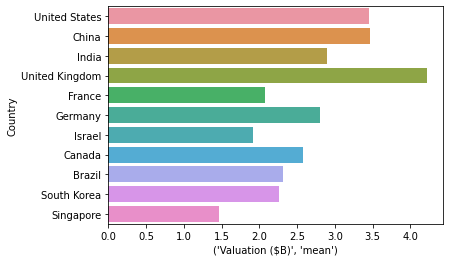

In [22]:
#Avg Valuations across contries
sns.barplot(x=temp[('Valuation ($B)','mean')],y=temp.index)

<AxesSubplot:xlabel="('Total Raised ($B)', 'mean')", ylabel='Country'>

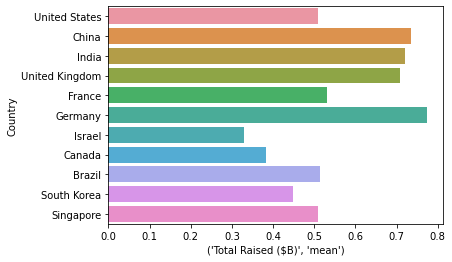

In [23]:
#Avg amount raised 
sns.barplot(x=temp[('Total Raised ($B)','mean')],y=temp.index)

<AxesSubplot:xlabel="('years_to_unicorn', 'mean')", ylabel='Country'>

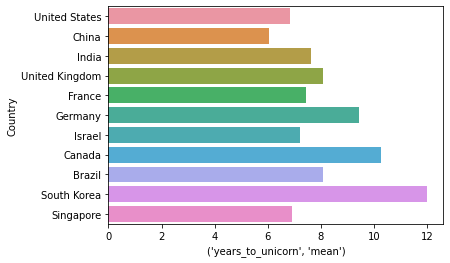

In [24]:
#Avg years it took to become unicorn
sns.barplot(x=temp[('years_to_unicorn','mean')],y=temp.index)

**Insights**


1. Germany with 0.77 Billion dollars leads in average amount raised by unicorns followed by China,India and UK.
<p>
2. UK is followed by China and US with almost equal mean valuations of unicorns.
<p>
3. Chinese companies took least time to become unicorns, around 6 years on average. 
<p>
4. Average valutions of unciorns in the UK is highest with a value of around 4.3 $ Billions.
<p>

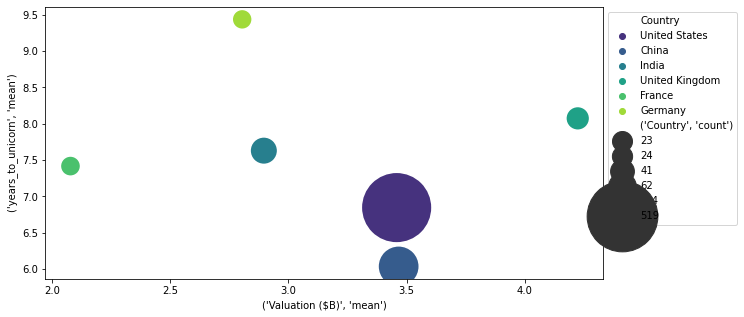

In [25]:
#Bubble Chart
# use the scatterplot function
temp=temp.loc[temp[('Country', 'count')]>20]
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,5]


sns.scatterplot(data=temp, x=('Valuation ($B)','mean'), y=('years_to_unicorn','mean'),palette="viridis",hue=temp.index ,legend=True,size=('Country','count'), alpha=1, sizes=(400, 5000))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
# show the graph


plt.show()

Insights

**City Analysis**

In [26]:
#City Analysis

temp=companies.groupby(by=['City']).agg({'City':['count'],'Valuation ($B)': ['sum', 'mean'],'Total Raised ($B)': ['sum', 'mean'],'years_to_unicorn':['mean']})
temp=temp.sort_values([('City', 'count')], ascending=False)
temp=temp.loc[temp[('City', 'count')]>10]
temp

City Valuation ($B)           Total Raised ($B)            \
              count            sum      mean               sum      mean   
City                                                                       
San Francisco   141         654.68  4.643121          69.44553  0.492521   
New York         92         213.95  2.325543          36.71546  0.399081   
Beijing          61         299.45  4.909016          53.50398  0.877114   
Shanghai         42         103.29  2.459286          27.02072  0.643350   
London           32         155.68  4.865000          24.96123  0.780038   
Bengaluru        27          92.50  3.425926          22.91052  0.848538   
Paris            19          43.39  2.283684          10.11609  0.532426   
Shenzhen         18          69.15  3.841667           9.30107  0.516726   
Berlin           17          38.28  2.251765          13.23375  0.778456   
Palo Alto        16          48.67  3.041875           8.50300  0.531438   
Mountain View    16          37.27  2.329375           7.21275  0.450797   
Chicago          16          32.37  2.023125           7.16150  0.447594   
Boston           15          63.48  4.232000           9.46289  0.630859   
Hangzhou         14          26.34  1.881429           8.98059  0.641471   
Tel Aviv         11          25.79  2.344545           4.35137  0.395579   
Sao Paulo        11          27.38  2.489091           5.77709  0.525190   

              years_to_unicorn  
                          mean  
City                            
San Francisco         6.269504  
New York              6.500000  
Beijing               5.606557  
Shanghai              5.809524  
London                7.187500  
Bengaluru             5.074074  
Paris                 7.105263  
Shenzhen              6.555556  
Berlin                5.294118  
Palo Alto             5.125000  
Mountain View         7.187500  
Chicago               9.750000  
Boston                9.533333  
Hangzhou              6.285714  
Tel Aviv              5.181818  
Sao Paulo             8.181818

<AxesSubplot:xlabel="('Valuation ($B)', 'mean')", ylabel='City'>

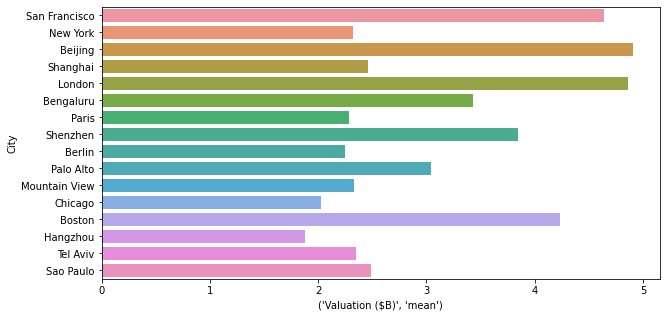

In [27]:
sns.barplot(x=temp[('Valuation ($B)','mean')],y=temp.index)

<AxesSubplot:xlabel="('Total Raised ($B)', 'mean')", ylabel='City'>

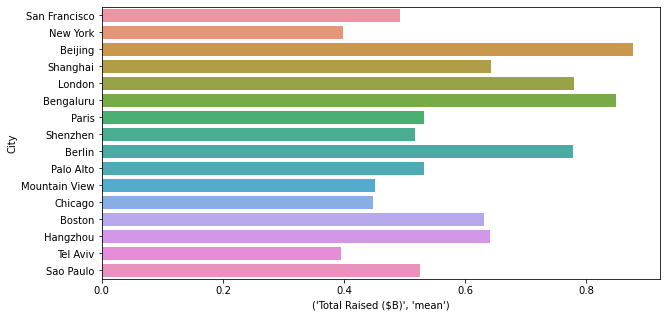

In [28]:
sns.barplot(x=temp[('Total Raised ($B)','mean')],y=temp.index)

<AxesSubplot:xlabel="('years_to_unicorn', 'mean')", ylabel='City'>

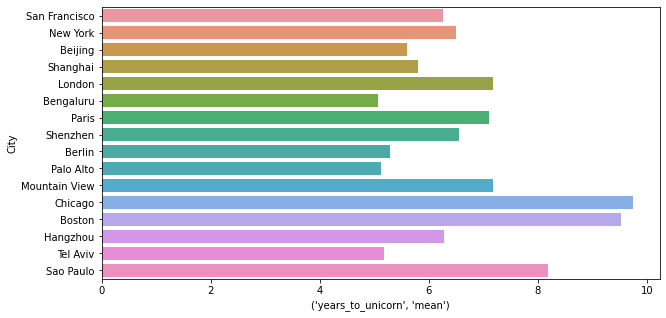

In [29]:
sns.barplot(x=temp[('years_to_unicorn','mean')],y=temp.index)

#insights

1. 

In [31]:
#Industry Analysis

temp=companies.groupby(by=['Industry']).agg({'Industry':['count'],'Valuation ($B)': ['sum', 'mean'],'Total Raised ($B)': ['sum', 'mean'],'years_to_unicorn':['mean']})
temp=temp.sort_values([('Industry', 'count')], ascending=False)
temp=temp.loc[temp[('Industry', 'count')]>10]
temp

Industry Valuation ($B)            \
                                       count            sum      mean   
Industry                                                                
Fintech                                  198         771.62  3.897071   
Internet software & services             189         551.83  2.919735   
E-commerce & direct-to-consumer          107         325.39  3.041028   
Artificial intelligence                   69         299.39  4.338986   
Health                                    67         176.72  2.637612   
Supply chain, logistics, & delivery       55         171.76  3.122909   
Other                                     54         262.00  4.851852   
Cybersecurity                             49         122.70  2.504082   
Data management & analytics               39         131.49  3.371538   
Mobile & telecommunications               35          79.52  2.272000   
Hardware                                  33         101.15  3.065152   
Edtech                                    28          90.77  3.241786   
Auto & transportation                     28          89.20  3.185714   
Consumer & retail                         24          74.13  3.088750   
Travel                                    14          38.60  2.757143   

                                    Total Raised ($B)            \
                                                  sum      mean   
Industry                                                          
Fintech                                      97.03350  0.490068   
Internet software & services                 73.05341  0.386526   
E-commerce & direct-to-consumer              73.55071  0.687390   
Artificial intelligence                      40.88262  0.592502   
Health                                       33.60411  0.501554   
Supply chain, logistics, & delivery          41.91172  0.762031   
Other                                        43.66574  0.808625   
Cybersecurity                                22.35340  0.456192   
Data management & analytics                  19.00160  0.487221   
Mobile & telecommunications                  15.08224  0.430921   
Hardware                                     25.39535  0.769556   
Edtech                                       22.02012  0.786433   
Auto & transportation                        34.38302  1.227965   
Consumer & retail                            13.18730  0.549471   
Travel                                       13.32174  0.951553   

                                    years_to_unicorn  
                                                mean  
Industry                                              
Fintech                                     6.676768  
Internet software & services                7.888889  
E-commerce & direct-to-consumer             6.504673  
Artificial intelligence                     6.594203  
Health                                      8.776119  
Supply chain, logistics, & delivery         6.836364  
Other                                       8.074074  
Cybersecurity                               6.816327  
Data management & analytics                 7.641026  
Mobile & telecommunications                 6.342857  
Hardware                                    5.909091  
Edtech                                      7.714286  
Auto & transportation                       5.142857  
Consumer & retail                           7.833333  
Travel                                      6.571429

<AxesSubplot:xlabel="('Valuation ($B)', 'mean')", ylabel='Industry'>

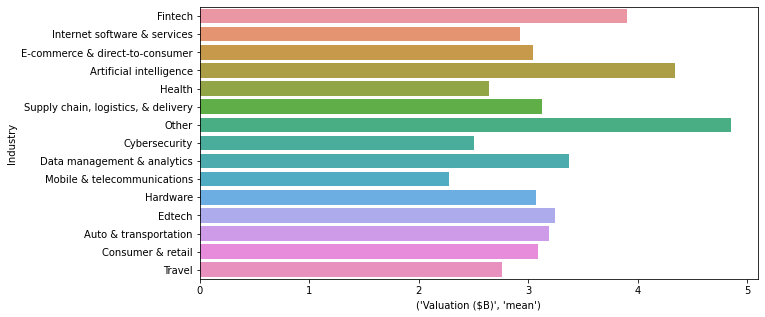

In [32]:
sns.barplot(x=temp[('Valuation ($B)','mean')],y=temp.index)

<AxesSubplot:xlabel="('Total Raised ($B)', 'mean')", ylabel='Industry'>

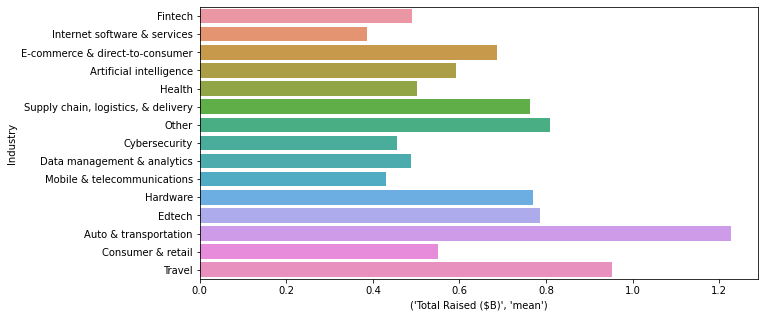

In [33]:
sns.barplot(x=temp[('Total Raised ($B)','mean')],y=temp.index)

<AxesSubplot:xlabel="('years_to_unicorn', 'mean')", ylabel='Industry'>

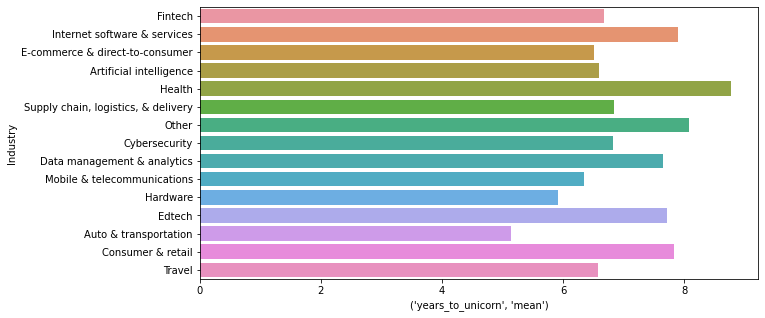

In [34]:
sns.barplot(x=temp[('years_to_unicorn','mean')],y=temp.index)

In [37]:
#Coverting the preprocessed dataframe to csv file

companies.to_csv('unicorn_companies_final.csv')